# Teste de hipótese com uma amostra (Parte 1/3)

#### O teste de hipótese com uma amostra consiste em uma série de etapas lógicas envolvendo técnicas da Estatística que rejeitam ou não uma hipótese tida inicialmente como verdadeira. As hipóteses sempre aparecem aos pares (hipótese nula e hipótese alternativa), sendo uma o complemento da outra. Com esse tipo de teste podemos validar ou não afirmações a respeito de parâmetros populacionais como média, proporção, variância e desvio. Há também o chamado teste de hipótese com duas amostras, mas esse será explanado em outro documento.

### Bibliotecas e configurações primárias

In [1]:
# Visualização.
import matplotlib.pyplot as plt 
import seaborn as sns

# Operações matemáticas.
import numpy as np

In [2]:
# Semente de reprodução.
np.random.seed(0)

# Estilização.
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (13,8)})
sns.set_style('whitegrid')

plt.rc('axes', titlesize=10)  # Título
plt.rc('axes', labelsize=18)  # Rótulos de x e y
plt.rc('xtick', labelsize=15) # Valores em x
plt.rc('ytick', labelsize=15) # Valores em y

# Distribuições

#### Para entender o teste de hipótese precisamos primeiro conhecer dois outros tópicos, Distribuições e Intervalos de Confiança. Vamos inicialmente definir matematicamente as principais distribuições e visualizá-las na Parte 1, enquanto os Intervalos de Confiança serão explanados na Parte 2. Por fim, na Parte 3, construíremos funções para os testes de hipótese propriamente ditos.

---
## Distribuições Contínuas

#### Uma distribuição é dita contínua se a variável independente pode assumir qualquer valor real dentro de um intervalo específico.

---
### Distribuição Uniforme

#### Definição Matemática

$$ \large f(x; a,b) = \begin{cases} \dfrac{1}{b-a}, & a \le x \le b, \\ 0, & c.c.\end{cases} $$

#### sendo:

$a$: Limite Inferior

$b$: Limite Superior

In [3]:
# Sempre que precisarmos de uma função densidade de probabilidade importaremos a sua classe respectiva da biblioteca estatística Scipy.
from scipy.stats import uniform

In [4]:
# Para a amostragem aleatória de n elementos de uma distribuição Scipy usamos o método rvs (random value sampling) com size=n.

data_uniform = uniform.rvs(size=10000, loc=10, scale=20)

# Acabamos de gerar uma amostra de 10000 elementos de uma Distribuição Uniforme com a=10 e b=10+20=30.

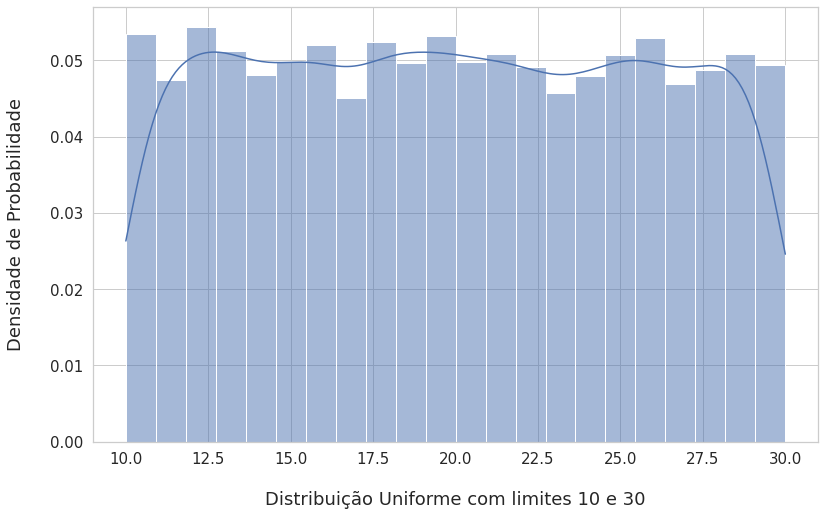

In [5]:
# O parâmetro kde=True gera um kernel de densidade estimado. Na prática é como se estivéssemos fazendo uma aproximação contínua da distribuição.

ax = sns.histplot(data_uniform, kde=True, stat='density')
ax.set(xlabel='\nDistribuição Uniforme com limites 10 e 30', ylabel='Densidade de Probabilidade\n')
plt.show()

---
### Distribuição Normal (Gaussiana)

#### Definição Matemática

$$ \large X \sim N(\mu, \sigma^2): f(x; \mu, \sigma) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{\large-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^{\huge 2}} $$

#### sendo:
$\mu$: Média Populacional

$\sigma^2$: Variância Populacional

$\sigma$: Desvio Padrão Populacional

#### Como veremos na Parte 2, a Distribuição Gaussiana de média 0 e desvio 1 é chamada de Distribuição Normal Padrão, sendo uma das distribuições mais importante da Estatística.

In [6]:
from scipy.stats import norm

In [7]:
data_norm = norm.rvs(size=10000, loc=3, scale=5)

# Amostra de 10000 elementos de uma Distribuição Gaussiana com μ = 3 e σ = 5.

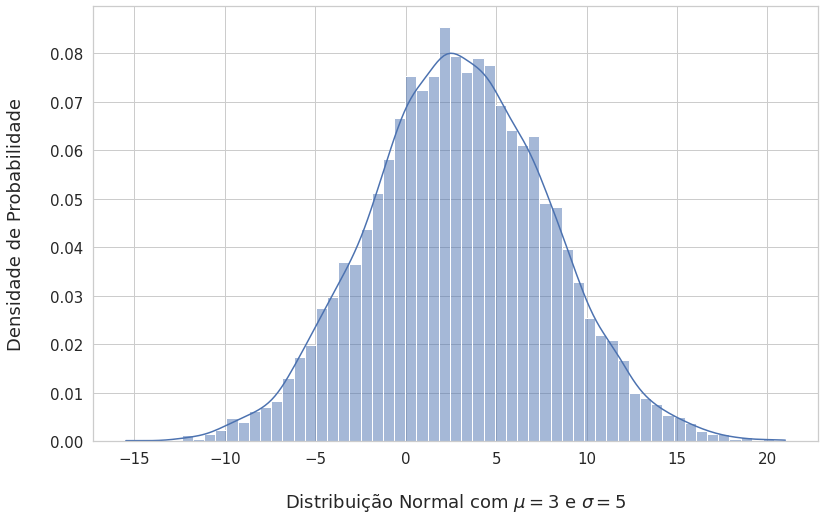

In [8]:
ax = sns.histplot(data_norm, kde=True, stat='density')
ax.set(xlabel='\nDistribuição Normal com $%s = 3$ e $%s = 5$'%('\\mu', '\\sigma'), ylabel='Densidade de Probabilidade\n')
plt.show()

---
### Distribuição Gama

#### Definição Matemática
$$ \large X \sim \Gamma(\alpha, \beta): f(x; \alpha, \beta) = \begin{cases}\dfrac{\beta^\alpha x^{1 - \alpha} e^{-\beta x}}{\Gamma(\alpha)}, & x \ge 0, \\ 0, & x < 0.\end{cases} $$

#### sendo:
$\alpha$: Forma da distribuição

$\beta$: Taxa da distribuição

$\Gamma(\alpha)$: Função Gama, definida como $\Gamma(\alpha)=(\alpha-1)!$

#### Dois tipos específicos de Distribuição Gama são a Distribuição Exponencial e a Distribuição Qui-Quadrado, esta última sendo de extrema importância no ramo da Estatística Inferencial e que também será discutida na Parte 2.

In [9]:
from scipy.stats import gamma

In [10]:
data_gamma = gamma.rvs(size=10000, a=5)

# Amostra de 10000 elementos de uma Distribuição Gama com α = 5 e β = 1. 
# Temos acesso ao coeficiente β na classe gamma usando scale (scale=1, por padrão).

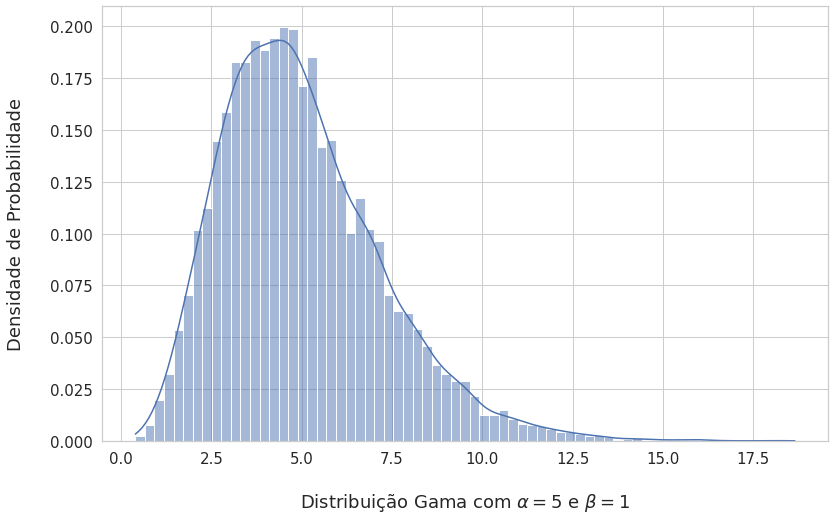

In [11]:
ax = sns.histplot(data_gamma, kde=True, stat='density')
ax.set(xlabel='\nDistribuição Gama com $%s = 5$ e $%s =  1$'%('\\alpha','\\beta') , ylabel='Densidade de Probabilidade\n')
plt.show()

---
### Distribuição Exponencial

#### Definição Matemática

$$ \large f(x;\lambda) = \begin{cases}\lambda e^{-\lambda x}, & x \ge 0, \\ 0, & x < 0.\end{cases} $$

#### sendo:

$\lambda$: Parâmetro lambda

#### Perceba que se α = 1 na equação da Distribuição Gama chegamos na Distribuição Exponencial:

$$ \large f(x; 1, \beta) = \dfrac{\beta^1 x^{1 - 1} e^{-\beta x}}{\Gamma(1)} = \beta e^{-\beta x} $$

In [12]:
from scipy.stats import expon

In [13]:
data_expon = expon.rvs(size=2000, scale=3)
# Amostra de 2000 elementos de uma Distribuição Exponencial com λ = 3.

data_gamma_2 = gamma.rvs(size=2000, a=1, scale=3)
# Dados equivalentes de uma Distribuição Gama com α = 1 e β = 3.

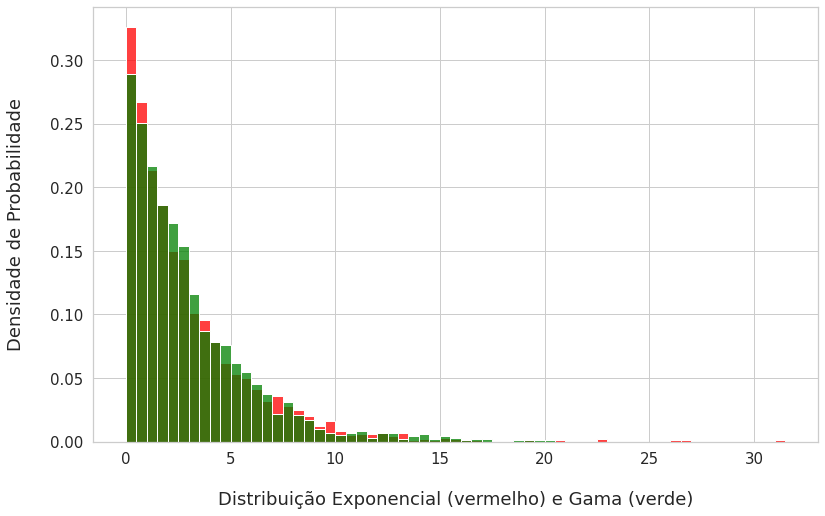

In [14]:
fig, ax = plt.subplots(1, 1)
sns.histplot(data_expon, ax=ax, color='red', binwidth=0.5, stat='density')
sns.histplot(data_gamma_2, ax=ax, color='green', binwidth=0.5, stat='density')
plt.xlabel('\nDistribuição Exponencial (vermelho) e Gama (verde)')
plt.ylabel('Densidade de Probabilidade\n')
plt.show()

---
## Distribuições Discretas

#### Uma distribuição é dita discreta se a variável independete só pode assumir valores inteiros em um dado intervalo.

---
### Binomial

#### Definição Matemática

$$ \large f(x=k;n,p) = \dbinom{n}{k} p^k q^{n-k} = \dfrac{n!}{k!(n-k)!}p^k(1-p)^{n-k} $$

#### sendo:
$n$: Tamanho da amostra

$p$: Chance de sucesso

$q$: Chance de fracasso (1 - p)

$k$: Número de sucessos da variável aleatória

In [15]:
from scipy.stats import binom

In [16]:
data_binom = binom.rvs(n=10, p=0.3, size=1000)

# 1000 números de sucesso (k) de amostras de uma Distribuição Binomial com cada amostra tendo 10 observações e chance de sucesso de 30%.

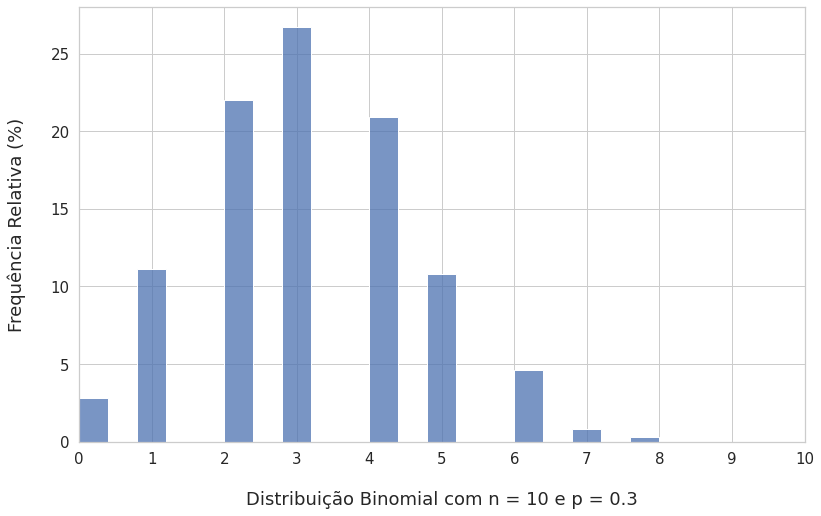

In [17]:
ax = sns.histplot(data_binom, stat='percent')
ax.set(xlabel='\nDistribuição Binomial com n = 10 e p = 0.3', ylabel='Frequência Relativa (%)\n', xlim=[0, 10], xticks=range(11))
plt.show()

---
### Distribuição de Poisson

#### Definição Matemática

$$ \large f(x=k;t,\lambda)=\dfrac{(\lambda t)^k e^{-(\lambda t)}}{k!} $$

#### sendo:
$\lambda$: Média de sucessos por unidade de intervalo

$t$: Unidades de intervalo

$k$: Número de sucessos da variável aleatória

In [18]:
from scipy.stats import poisson

In [19]:
data_poisson = poisson.rvs(size=1000, mu=3)

# 1000 números de sucessos (k) de amostras de uma Distribuição de Poisson com λ = 3, a classe poisson é implementada com t=1.

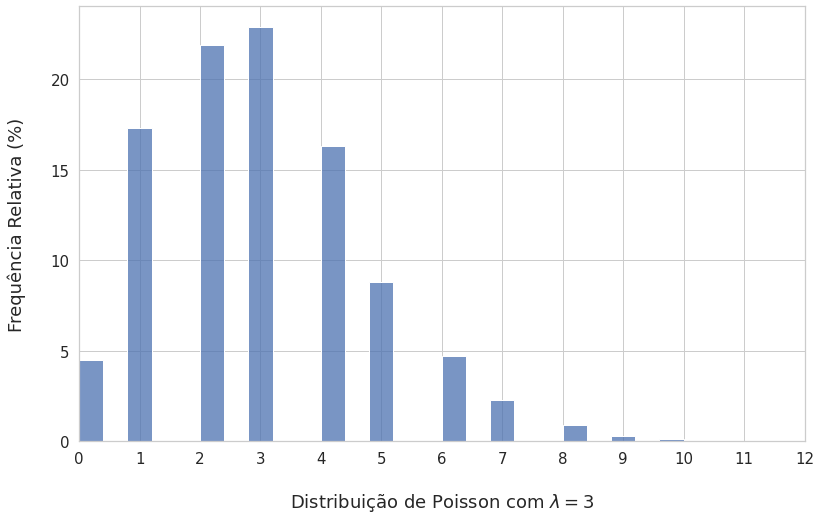

In [20]:
ax = sns.histplot(data_poisson, stat='percent')
ax.set(xlabel='\nDistribuição de Poisson com $%s = 3$'%('\\lambda'), ylabel='Frequência Relativa (%)\n', xlim=[0, 12], xticks=range(13))
plt.show()